## 演示KNN分类任务的代码实现（后面也会有调库实现的版本）

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### 样本

In [2]:
## 样本特征
data_X = [
    [1.3, 6],
    [3.5, 5],
    [4.2, 2],
    [5, 5.3],
    [2, 9],
    [5, 5.7],
    [7.2, 4],
    [8.1, 8],
    [9, 9.2]
]

In [3]:
## 样本标记
data_y = [0,0,0,0,1,1,1,1,1]

#### 训练集

In [4]:
## 为了方便计算，我将样本导入numpy数组，作为训练集
X_train = np.array(data_X)
y_train = np.array(data_y)

In [5]:
X_train

array([[1.3, 6. ],
       [3.5, 5. ],
       [4.2, 2. ],
       [5. , 5.3],
       [2. , 9. ],
       [5. , 5.7],
       [7.2, 4. ],
       [8.1, 8. ],
       [9. , 9.2]])

In [6]:
y_train

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

#### 分群体看不同群体的分布，群体只有0和1 (y只有0和1)

In [7]:
# 首先看y=0的群体
# 这是群体0的0号特征向量
X_train[y_train == 0, 0]

array([1.3, 3.5, 4.2, 5. ])

In [8]:
# 这是群体0的1号特征向量
X_train[y_train == 0, 1]

array([6. , 5. , 2. , 5.3])

In [9]:
# 这是群体1的0号特征向量
X_train[y_train == 1, 0]

array([2. , 5. , 7.2, 8.1, 9. ])

In [10]:
# 这是群体1的1号特征向量
X_train[y_train == 1, 1]

array([9. , 5.7, 4. , 8. , 9.2])

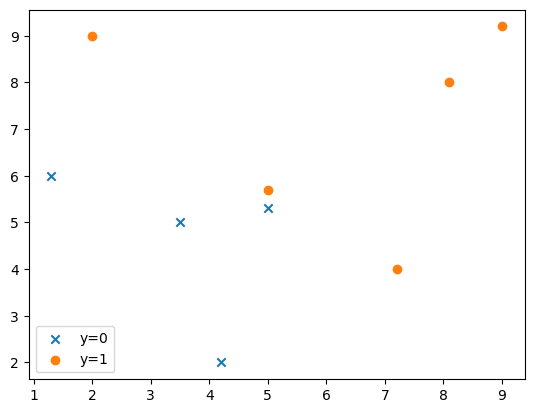

In [11]:
# 所以我们就可以直接将群体0的特征向量放在特征空间中，看他们的分布情况，采用matploylib
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='y=0', marker='x')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='y=1', marker='o')
plt.legend()
plt.show()

In [12]:
# 接着我们看代求数据是什么，将其放在图上
data_new = np.array([4,5]) # 也就是0号特征是4，1号特征是5

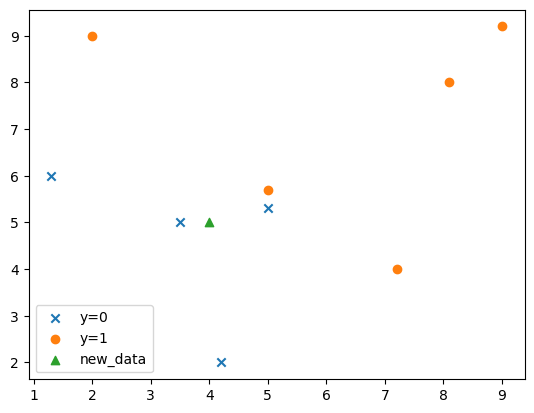

In [13]:
# 我们看看他的分布
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='y=0', marker='x')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='y=1', marker='o')
plt.scatter(data_new[0], data_new[1], label='new_data', marker='^')
plt.legend()
plt.show()

## 手写KNN分类任务

In [14]:
# 先设置K=5, 我先采用5，这是没有优化的，后面再讲如何判断K的选值
k = 5

In [15]:
# 计算未知点与各个点的距离
# 这里采用的是欧式距离，也就是p=2的明式距离，为什么直接选择p=2的明式距离，这个也是和K一样属于参数的选择优化的一部分
# 而且这里我们没有设置距离的权重，也就是说只要是能投票的K个点，他们的投票权都是一样的，这些都会放在超参数那里讲  

distance_array = [np.sqrt(np.sum((data-data_new)**2)) for data in X_train ]
distance_array

[2.879236009777594,
 0.5,
 3.006659275674582,
 1.0440306508910548,
 4.47213595499958,
 1.2206555615733703,
 3.3526109228480423,
 5.080354318352215,
 6.529931086925803]

In [16]:
# 采用arg计算最近点的索引数组
knn_index = np.argsort(distance_array)[:5]

In [17]:
# 通过这5个点去找特征标记数组
first_k = y_train[knn_index]
first_k

array([0, 0, 1, 0, 0])

In [18]:
from collections import Counter
Counter(first_k)

Counter({0: 4, 1: 1})

In [19]:
Counter(first_k).most_common()

[(0, 4), (1, 1)]

In [20]:
Counter(first_k).most_common(1)

[(0, 4)]

In [21]:
predict_y = Counter(first_k).most_common(1)[0][0]  # 这就是最终结果
predict_y

0

## scikit-learn中的KNN算法

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# scikit-learn的算法都是通过类封装的
knn_classifier = KNeighborsClassifier(n_neighbors = 5)

In [24]:
# 给特征和标记进行训练
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# 预测
knn_classifier.predict(data_new.reshape(1,-1))

array([0])